In [1]:
import sys
from pathlib import Path
import time
project_path = Path("/data/hdd1/users/kmparmp/DeepLearning_2024_2025_DSIT/")
sys.path.append(str(project_path))
from utils.PDFSerlalizer import DocumentHandler

/data/hdd1/users/kmparmp/miniconda3/envs/dnn/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
pdf_file = "/data/hdd1/users/kmparmp/DeepLearning_2024_2025_DSIT/kostas_ignore/singapore-catalogue.pdf"
image_dir = "/data/hdd1/users/kmparmp/DeepLearning_2024_2025_DSIT/utils/output/"

doc = DocumentHandler()
doc.extract_images(
    pdf_file,
    image_dir,
    verbose=False,
    export_pages=False,
    export_figures=True,
    export_tables=True,
    do_ocr=True,
    do_table_structure=True,
    add_caption=True,
    filter_irrelevant=True,
    generate_metadata=False,
    generate_annotated_pdf=False,
    generate_descriptions=True,
    generate_table_markdown=True,
    relevant_passages=2,
    prompt_passages=True
)

`Qwen2VLRotaryEmbedding` can now be fully parameterized by passing the model config through the `config` argument. All other arguments will be removed in v4.46
Loading checkpoint shards: 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]
You shouldn't move a model that is dispatched using accelerate hooks.


{'image_count': 106,
 'metadata_path': None,
 'annotated_pdf_path': None,
 'descriptions_generated': True}

In [3]:
from utils.ImageIndexer import ResNetIndexer, CLIPIndexer, ByaldiIndexer, visualize_results
index_dir = "/data/hdd1/users/kmparmp/DeepLearning_2024_2025_DSIT/demos/indexes/"

resnet = ResNetIndexer()
clip = CLIPIndexer()
byaldi = ByaldiIndexer()

print("Creating indexes...")
print("ResNet")
resnet.create_index(image_dir, index_dir+"resnet")
print("CLIP")
clip.create_index(image_dir, index_dir+"clip")
print("Byaldi")
byaldi.create_index(image_dir, index_dir+"byaldi")

Creating indexes...
ResNet
CLIP


/home/kmparmp/.cache/huggingface/modules/transformers_modules/jinaai/jina-clip-implementation/51f02de9f2cf8afcd3bac4ce996859ba96f9f8e9/modeling_clip.py:175: UserWarning: xFormers is not installed. Check https://github.com/facebookresearch/xformers?tab=readme-ov-file#installing-xformers for installation instructions, disabling
  warnings.warn(
/data/hdd1/users/kmparmp/miniconda3/envs/dnn/lib/python3.12/site-packages/flash_attn/ops/triton/layer_norm.py:984: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  @custom_fwd
/data/hdd1/users/kmparmp/miniconda3/envs/dnn/lib/python3.12/site-packages/flash_attn/ops/triton/layer_norm.py:1043: FutureWarning: `torch.cuda.amp.custom_bwd(args...)` is deprecated. Please use `torch.amp.custom_bwd(args..., device_type='cuda')` instead.
  @custom_bwd


Byaldi
Verbosity is set to 1 (active). Pass verbose=0 to make quieter.


`config.hidden_act` is ignored, you should use `config.hidden_activation` instead.
Gemma's activation function will be set to `gelu_pytorch_tanh`. Please, use
`config.hidden_activation` if you want to override this behaviour.
See https://github.com/huggingface/transformers/pull/29402 for more details.
Loading checkpoint shards: 100%|██████████| 2/2 [00:01<00:00,  1.21it/s]


overwrite is on. Deleting existing index pdfs_images to build a new one.
Indexing file: /data/hdd1/users/kmparmp/DeepLearning_2024_2025_DSIT/utils/output/singapore-catalogue-picture-74.png
Added page 1 of document 0 to index.
Index exported to /data/hdd1/users/kmparmp/DeepLearning_2024_2025_DSIT/demos/indexes/byaldi/pdfs_images
Indexing file: /data/hdd1/users/kmparmp/DeepLearning_2024_2025_DSIT/utils/output/singapore-catalogue-picture-99.png
Added page 1 of document 1 to index.
Index exported to /data/hdd1/users/kmparmp/DeepLearning_2024_2025_DSIT/demos/indexes/byaldi/pdfs_images
Indexing file: /data/hdd1/users/kmparmp/DeepLearning_2024_2025_DSIT/utils/output/singapore-catalogue-picture-65.png
Added page 1 of document 2 to index.
Index exported to /data/hdd1/users/kmparmp/DeepLearning_2024_2025_DSIT/demos/indexes/byaldi/pdfs_images
Indexing file: /data/hdd1/users/kmparmp/DeepLearning_2024_2025_DSIT/utils/output/singapore-catalogue-picture-8.png
Added page 1 of document 3 to index.
Inde

In [4]:
query_image_path = "/data/hdd1/users/kmparmp/DeepLearning_2024_2025_DSIT/kostas_ignore/test.png"

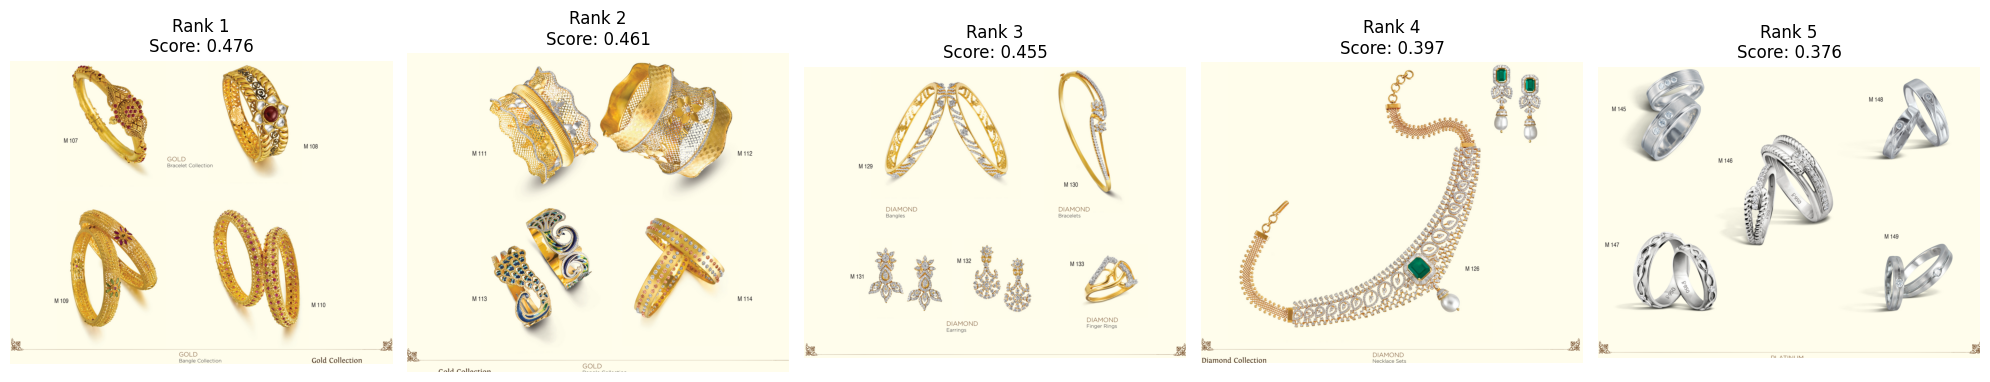

In [5]:
results = resnet.query_by_image(query_image_path, index_dir+"resnet")
visualize_results(results)

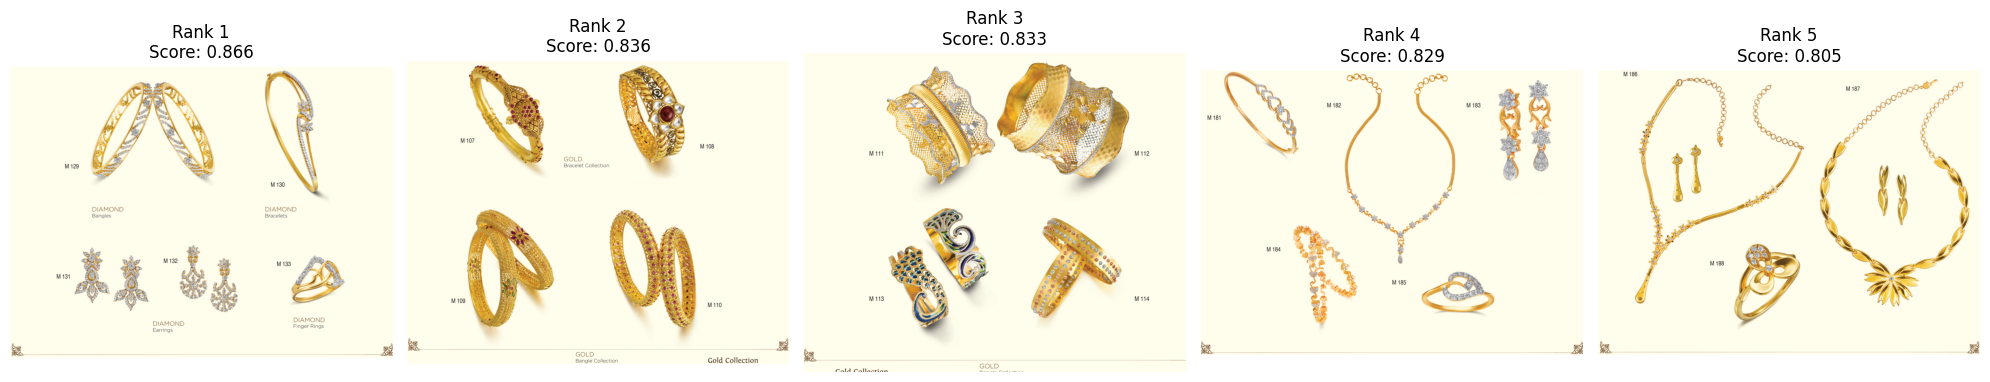

In [6]:
results = clip.query_by_image(query_image_path, index_dir+"clip")
visualize_results(results)

Verbosity is set to 1 (active). Pass verbose=0 to make quieter.


Loading checkpoint shards: 100%|██████████| 2/2 [00:01<00:00,  1.08it/s]
/data/hdd1/users/kmparmp/miniconda3/envs/dnn/lib/python3.12/site-packages/byaldi/colpali.py:162: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issu

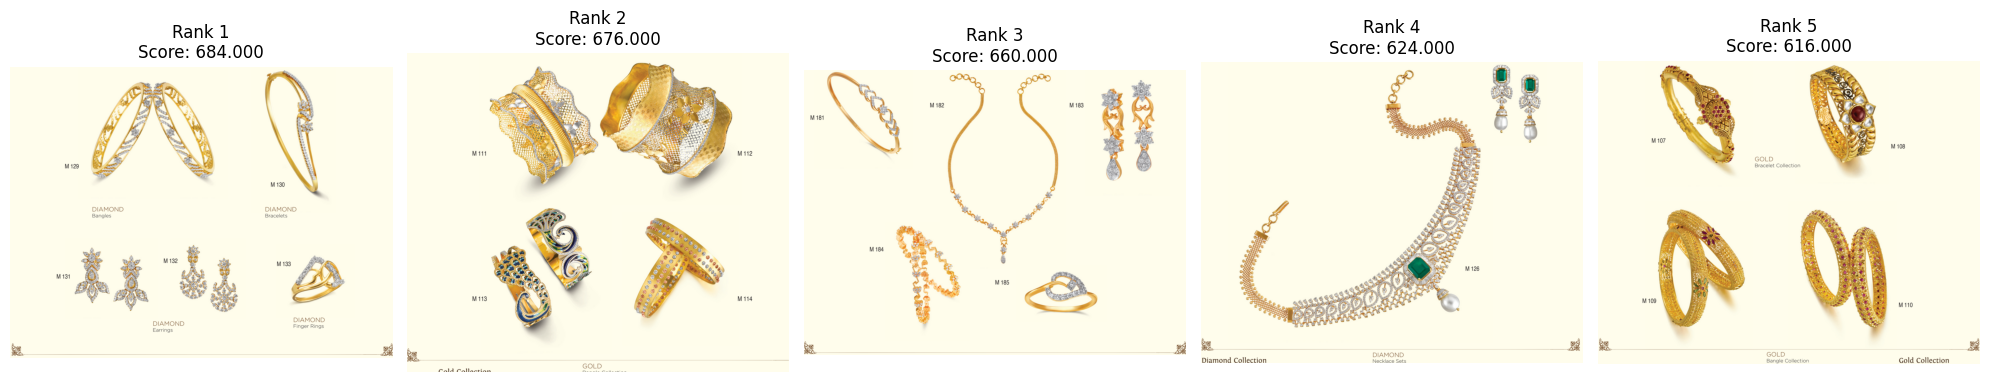

In [7]:
results = byaldi.query_by_image(query_image_path, image_dir, index_dir+"byaldi")
visualize_results(results)